# OSEMN Exercises

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [ ]:
import json
data = json.load(open('user_data.json'))

personemastercard =[]
for p in range(0,len(data)):
    if data[p]["CreditCardType"] == "MasterCard" :
        personemastercard.append(data[p])
        
with open('data.csv', 'w') as f:
    json.dump(personemastercard, f)


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


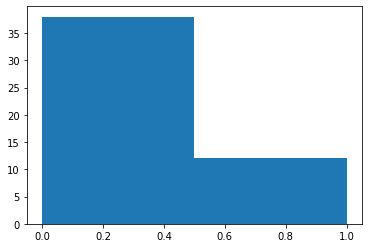

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

file_name="mushrooms_categorized.csv"
data=pd.read_csv(file_name,nrows=50,skiprows=range(1,1))


isto = pd.DataFrame(data["class"])

plt.hist( isto.T,density=False, bins = 2)
plt.show()


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

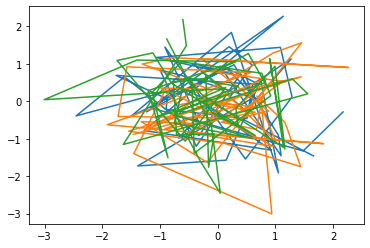

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_name1="regression_generated.csv"
regression_data=pd.read_csv(file_name1,nrows=50,skiprows=range(1,1))

regression_data

dati1 = pd.DataFrame(regression_data["features_1"])
dati2 = pd.DataFrame(regression_data["features_2"])
dati3 = pd.DataFrame(regression_data["features_3"])

plt.plot(dati1,dati2)
plt.plot(dati2,dati3)
plt.plot(dati3,dati1)
 

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [27]:
df = pd.DataFrame(data)
df.to_json ('export_data.json')